# 1. Derivation of Least Squares Solution using Calculus

## (a) Using the fact that $\left\lVert x \right\rVert^2_2 = \langle x,x \rangle_2 = x^Tx$ show that

$$
\left\lVert Ax - b \right\rVert^2_2 = x^TA^TAx - 2x^TA^Tb + b^Tb
$$

Using the definition above:

$$\left\lVert Ax - b \right\rVert^2_2 = (Ax - b)^T (Ax - b)$$

A matrix transpose is distributive under subtraction:

$$(Ax - b)^T (Ax - b) = (Ax^T - b^T)(Ax - b)$$

By distributivity of matrix multiplcation:

$$((Ax)^T - b^T)(Ax - b) = (Ax)^TAx - (Ax)^Tb - b^TAx + b^Tb$$

Because $Ax$ and $b$ are vectors, $(Ax)^Tb$ and $b^TAx$ are both dot products of the same two vectors, and therefore equal:

$$Ax)^TAx - (Ax)^Tb - b^TAx + b^Tb =  x^TA^TAx - 2x^TA^Tb + b^Tb$$

## (b) Calculate $\nabla F(x)$ and solve for $x$ to show that the least squares solution is given by:

$$
x = (A^TA)^{-1}A^Tb
$$

Working backwards through the terms in $ x^TA^TAx - 2x^TA^Tb + b^Tb$:

$b^Tb$ will dissappear in the gradient function because it does not depend on $x$. Therefore:

$$
grad[b^Tb] = 0
$$ 

By the gradient product rule:

$$
grad[-2x^TA^Tb] = -2A^Tb
$$

Again by the gradient product rule:

$$
grad[x^TA^TAx] = grad[x^TA^T]Ax + x^TA^Tgrad[Ax]
$$

$$
= A^TAx + x^TA^TA
$$

A matrix multiplied by it's transpose is a symmetric matrix. For a symmetric matrix $M$, $Mx = x^TM$. Therefore $(A^TA)x = x^T(A^TA)$ and the final result is:

$$
= 2A^TAx
$$

So now we have:

$$
\nabla F(x) = 2A^TAx - 2A^Tb
$$

We're interested in where the gradient is equal to 0 and solving for $x$:

$$
0 =  2A^TAx - 2A^Tb
$$

$$
2A^Tb =  2A^TAx 
$$

$$
A^Tb =  A^TAx 
$$

$$
(A^TA)^{-1}A^Tb =  x
$$

# 2. Fitting a quadratic to data

Data: (0,1), (1, 2), (2, 1/2), (3, 3)

We want a matrix $A$ to contain 3 columns for each term in the polynomial evaluated at the $t$ and 4 columns for each $t$ value in the data set (0-3 inclusive).

We want to find a vector $x$ representing the coefficients for the polynomial that best approximates $b$, the vector containing the $y$ values from the data set.

$$
A = \begin{bmatrix}
1& 0& 0 \\
1& 1& 1 \\
1& 2& 4 \\
1& 3& 9
\end{bmatrix}
$$

$$
y = \begin{bmatrix}
1 \\
2 \\
1/2 \\
3 \\
\end{bmatrix}
$$

From problem 1, we can find x by plugging in $A$ and $b$ into 

$$
(A^TA)^{-1}A^Tb =  x
$$



In [31]:
A = np.array([[1., 0., 0.], [1.,1.,1.], [1.,2.,4.], [1.,3.,9.]])
A_t = A.transpose()
b = np.array([1.,2.,.5,3.])

np.linalg.inv(A_t @ A) @ A_t @ b

array([ 1.325, -0.675,  0.375])

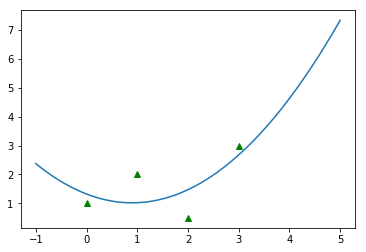

In [42]:
import matplotlib.pyplot as plt

f = lambda x: (1.325 - (0.675 * x) + (0.375 * x**2))
interval = np.linspace(-1,5,1000)
out = np.vectorize(f)(interval)

t = np.array([0.,1.,2.,3.])

plt.plot(interval, out, t, b, 'g^')